In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                          user = "postgres",
                                          password = "amiIstiaq6045",
                                          host = "127.0.0.1",
                                          port = "5432")
    def getConnection(self):
        print("Connection to DB established!")
        return self.connection
con = PostgresConnection().getConnection()

Connection to DB established!


<h4>division wise total_sale_price joining fact table and store dimension table</h4>

In [3]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT store_dim.division as "Division", SUM(fact_table.total_price) "Total Sale Price" 
FROM star_schema.fact_table 
JOIN star_schema.store_dim ON store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.division) 
ORDER BY store_dim.division"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_division = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
total_price_by_divisions = total_price_by_division.dropna()

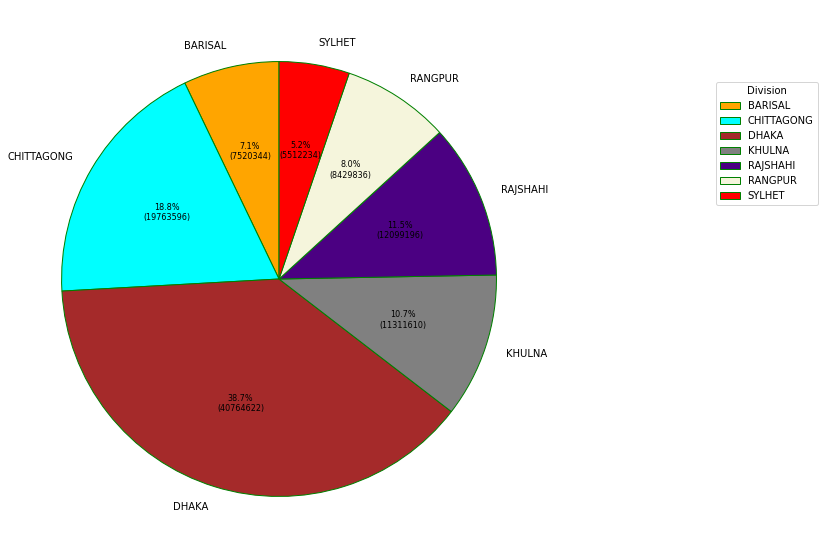

In [5]:
import numpy as np
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige", "red")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(20, 10))
wedges, texts, autotexts = ax.pie(total_price_by_divisions['Total Sale Price'],
								autopct = lambda pct: func(pct, total_price_by_divisions['Total Sale Price']),
# 								explode = explode,
								labels = total_price_by_divisions['Division'],
# 								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))
ax.legend(wedges, total_price_by_divisions['Division'],
		title ="Division",
		loc ="center right",
		bbox_to_anchor =(1, 0.5, 0.5, 0.5))
plt.setp(autotexts, size = 8)
plt.show()

district wise total_sale_price joining fact table and store dimension table

In [6]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT store_dim.district as "District", SUM(fact_table.total_price) "Total Sale Price" 
FROM star_schema.fact_table 
JOIN star_schema.store_dim ON store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.district) 
ORDER BY store_dim.district"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_district = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
total_price_by_districts = total_price_by_district.dropna()
total_price_by_districts

,District,Total Sale Price
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


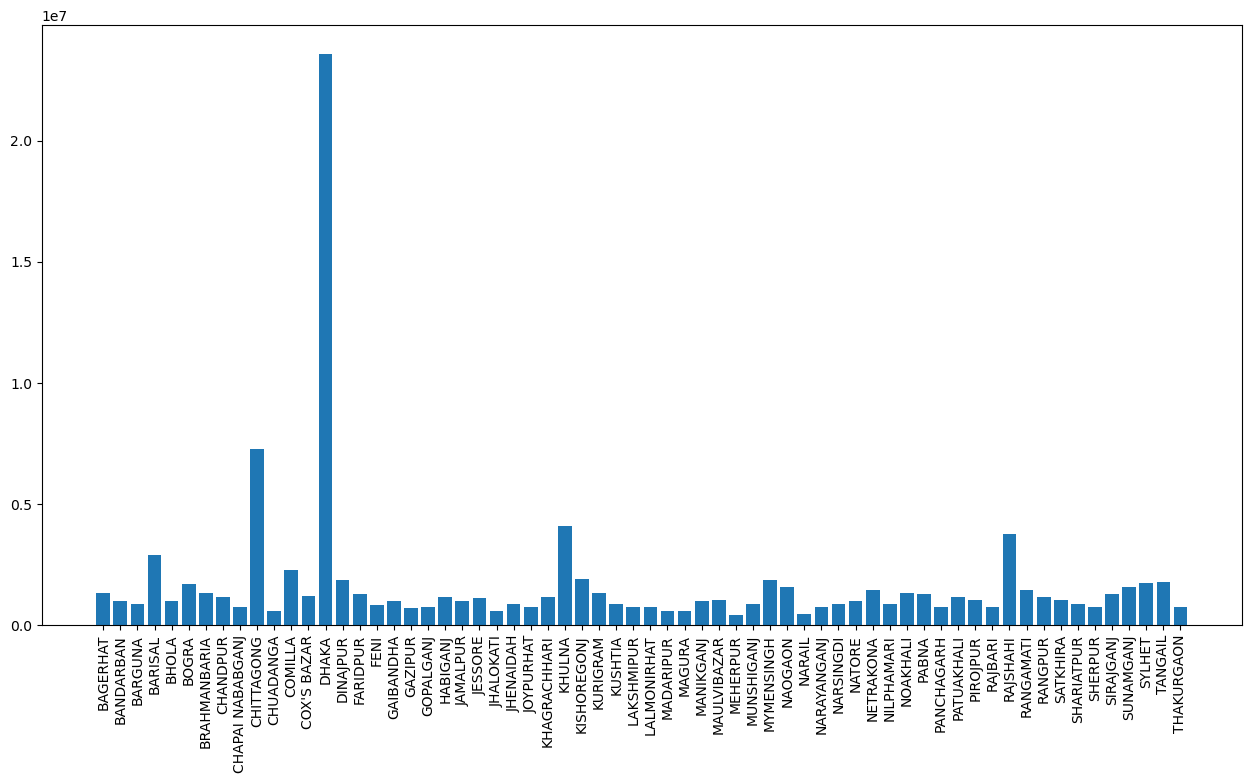

In [8]:
fig = plt.figure(figsize=(12, 6),dpi = 100)
ax = fig.add_axes([0,0,1,1])
langs = total_price_by_districts['District']
y = total_price_by_districts['Total Sale Price']
ax.bar(langs,y)
plt.xticks(range(len(y)), langs, rotation='vertical')
plt.show()

year wise total_sale_price joining fact table and Time dimension table

In [9]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT time_data.year as "Year", SUM(fact_table.total_price) "Total Sale Price"
FROM star_schema.fact_table
JOIN star_schema.time_data ON time_data.time_key = fact_table.time_key
GROUP BY CUBE(time_data.year)
ORDER BY time_data.year"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_year = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
total_price_by_years = total_price_by_year.dropna()

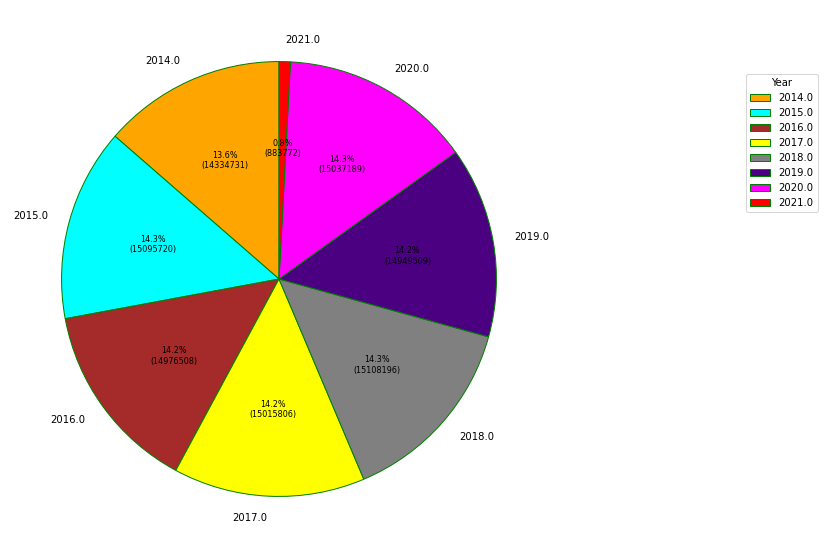

In [11]:
colors = ( "orange", "cyan", "brown","yellow","grey", "indigo", "magenta", "red")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(20, 10))
wedges, texts, autotexts = ax.pie(total_price_by_years['Total Sale Price'],
								autopct = lambda pct: func(pct, total_price_by_years['Total Sale Price']),
# 								explode = explode,
								labels = total_price_by_years['Year'],
# 								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))
ax.legend(wedges, total_price_by_years['Year'],
		title ="Year",
		loc ="center right",
		bbox_to_anchor =(1, 0.5, 0.5, 0.5))
plt.setp(autotexts, size = 8)
plt.show()

month wise total_sale_price joining fact table and Time dimension table


In [12]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT time_data.month as "Month", SUM(fact_table.total_price) "Total Sale Price"
FROM star_schema.fact_table
JOIN star_schema.time_data ON time_data.time_key = fact_table.time_key
GROUP BY CUBE(time_data.month)
ORDER BY time_data.month"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_month = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
total_price_by_months = total_price_by_month.dropna()

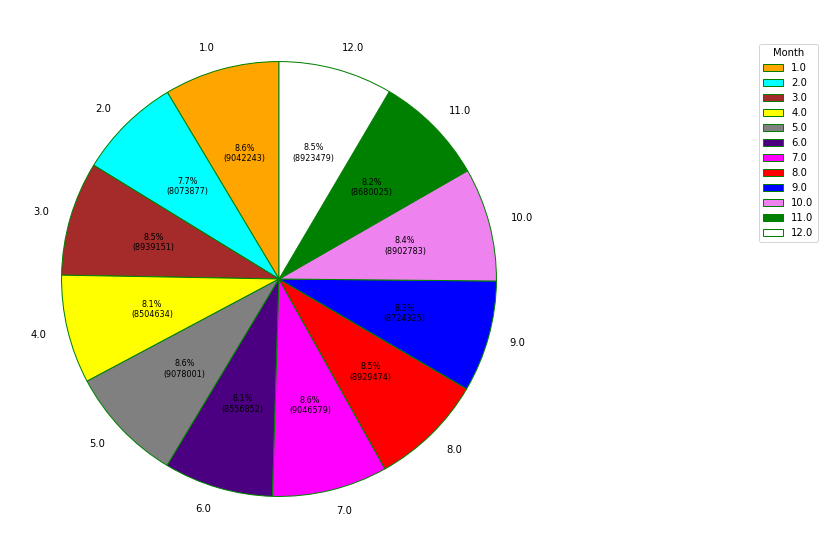

In [14]:
colors = ( "orange", "cyan", "brown","yellow","grey", "indigo", "magenta", "red","blue","violet", "green", "white")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(20, 10))
wedges, texts, autotexts = ax.pie(total_price_by_months['Total Sale Price'],
								autopct = lambda pct: func(pct, total_price_by_months['Total Sale Price']),
# 								explode = explode,
								labels = total_price_by_months['Month'],
# 								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))
ax.legend(wedges, total_price_by_months['Month'],
		title ="Month",
		loc ="center right",
		bbox_to_anchor =(1, 0.5, 0.5, 0.5))
plt.setp(autotexts, size = 8)
plt.show()

**Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table **

customer wise total sale price joining fact table and customer dimension table

In [15]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT customer_dim.name as "Name", SUM(fact_table.total_price) "Total Sale Price"
FROM star_schema.fact_table
JOIN star_schema.customer_dim ON customer_dim.coustomer_key = fact_table.coustomer_key
JOIN star_schema.trans_dim ON trans_dim.payment_key = fact_table.payment_key
WHERE (trans_type = 'cash' OR trans_type = 'mobile')
GROUP BY CUBE(customer_dim.name)
ORDER BY customer_dim.name"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_customer = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [16]:
total_price_by_customer

,Name,Total Sale Price
0,-,2191.50
1,????,1670.75
2,?????,1968.25
3,????? ??,1044.50
4,??????,498.50
...,...,...
4531,zeenat,2207.50
4532,zenab khan,733.00
4533,zina kumari,999.25
4534,ziyabul,638.25


bank wise total sale price joining fact table and Transaction dimension table

In [17]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT trans_dim.bank_name as "Bank Name", SUM(fact_table.total_price) "Total Sale Price"
FROM star_schema.fact_table
JOIN star_schema.trans_dim ON trans_dim.payment_key = fact_table.payment_key
GROUP BY CUBE(trans_dim.bank_name)
ORDER BY trans_dim.bank_name"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_bank= pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [18]:
total_price_by_banks = total_price_by_bank.dropna()

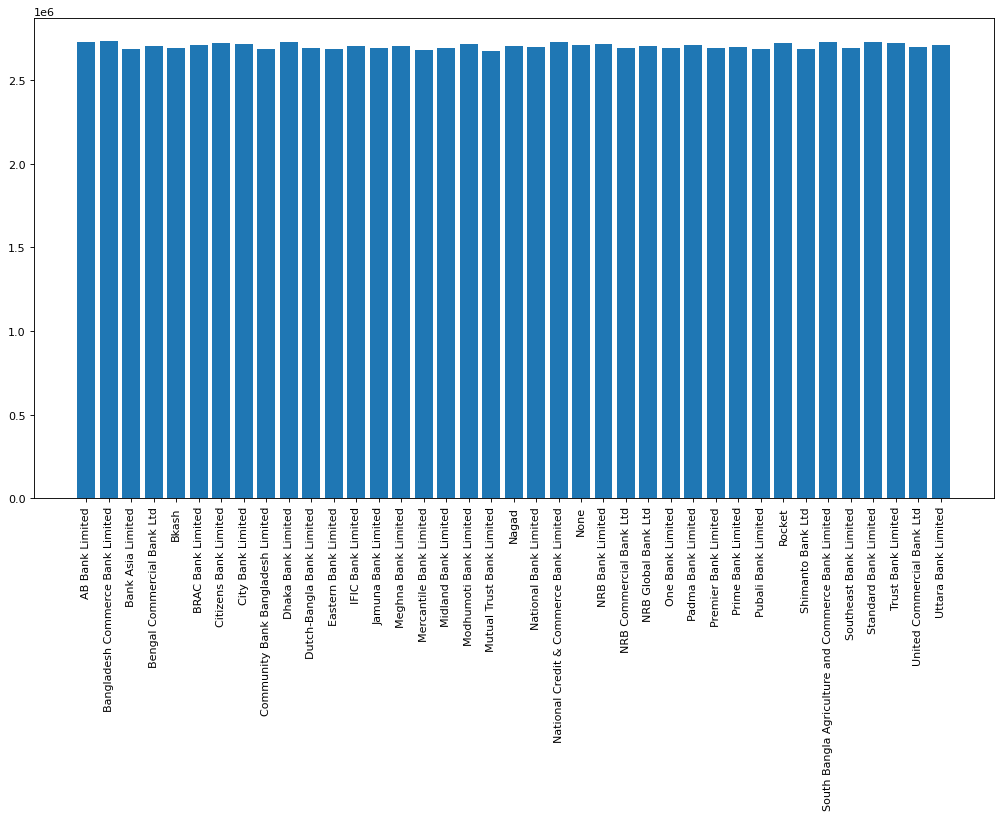

In [19]:
fig = plt.figure(figsize=(12, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
langs = total_price_by_banks['Bank Name']
y = total_price_by_banks['Total Sale Price']
ax.bar(langs,y)
plt.xticks(range(len(y)), langs, rotation='vertical')
plt.show()

transaction wise total sale price joining fact table and Transaction dimension table

In [20]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT trans_dim.trans_type as "Transaction Type", SUM(fact_table.total_price) "Total Sale Price"
FROM star_schema.fact_table
JOIN star_schema.trans_dim ON trans_dim.payment_key = fact_table.payment_key
GROUP BY CUBE(trans_dim.trans_type)
ORDER BY trans_dim.trans_type"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_price_by_trans_type = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [21]:
total_price_by_trans_types = total_price_by_trans_type.dropna()
total_price_by_trans_types

,Transaction Type,Total Sale Price
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


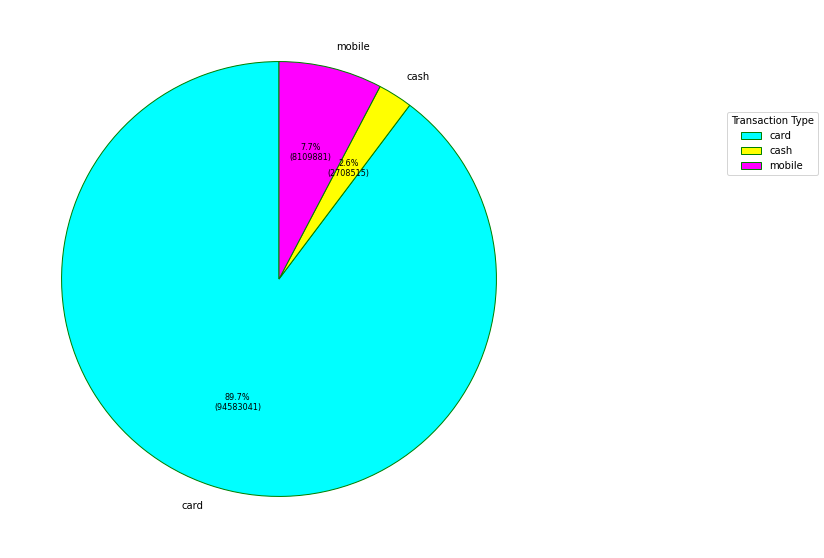

In [22]:
colors = ( "cyan","yellow", "magenta")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(20, 10))
wedges, texts, autotexts = ax.pie(total_price_by_trans_types['Total Sale Price'],
								autopct = lambda pct: func(pct, total_price_by_trans_types['Total Sale Price']),
# 								explode = explode,
								labels = total_price_by_trans_types['Transaction Type'],
# 								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))
ax.legend(wedges, total_price_by_trans_types['Transaction Type'],
		title ="Transaction Type",
		loc ="center right",
		bbox_to_anchor =(1, 0.5, 0.5, 0.5))
plt.setp(autotexts, size = 8)
plt.show()

Total Sales in Barisal

In [23]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT store_dim.district as "District", SUM(fact_table.total_price) "Total Sales"
FROM star_schema.fact_table
JOIN star_schema.store_dim ON store_dim.store_key = fact_table.store_key
WHERE store_dim.district = 'BARISAL'
GROUP BY CUBE(store_dim.district)"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_sales_in_barisal = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [24]:
total_sales_in_barisal

,District,Total Sales
0,BARISAL,2897237.75
1,None,2897237.75


Total Sales in 2015

In [25]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT time_data.year as "Year", SUM(fact_table.total_price) "Total Sales"
FROM star_schema.fact_table
JOIN star_schema.time_data ON time_data.time_key = fact_table.time_key
WHERE time_data.year = '2015'
GROUP BY CUBE(time_data.year)"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_sales_in_2015 = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [99]:
total_sales_in_2015.dropna()

,Year,Total Sales
0,2015.0,15095720.25


Total Sales in 2015 and in Barisal

In [27]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT time_data.year as "Year", store_dim.district as "District", SUM(fact_table.total_price) "Total Sales"
FROM star_schema.fact_table
JOIN star_schema.time_data 
ON time_data.time_key = fact_table.time_key 
JOIN star_schema.store_dim 
ON store_dim.store_key = fact_table.store_key
WHERE time_data.year = '2015'
AND store_dim.district = 'BARISAL'
GROUP BY CUBE(time_data.year,store_dim.district)"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_sales_in_2015_and_barisal = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [28]:
total_sales_in_2015_and_barisal.dropna()

,Year,District,Total Sales
0,2015.0,BARISAL,415748.75


Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [166]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT store_dim.store_key, item_dim.item_name
        FROM star_schema.fact_table
        JOIN star_schema.store_dim ON store_dim.store_key = fact_table.store_key
        JOIN star_schema.item_dim ON item_dim.item_key = fact_table.item_key
        GROUP BY store_dim.store_key,item_dim.item_name
        ORDER BY store_key, SUM(quantity) DESC"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
top_three_products = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [167]:
top_three_products=top_three_products.groupby('store_key').head(3)
# top_three_products=top_three_products.groupby(['store_key','item_name'])
top_three_products

,store_key,item_name
0,S0001,Pepsi - 12 oz cans
1,S0001,Muscle Milk Protein Shake Van. 11oz
2,S0001,Hefty Supreme Foam Plates 6 inch
257,S0002,Planters Nut-trition 1.5 oz
258,S0002,Altoids Small Packs Variety
...,...,...
186597,S0098,Cliff Builders Protein Bar Variety Pack
186598,S0098,Pepsi - 12 oz cans
186855,S0099,Pepsi - 12 oz cans
186856,S0099,Diet Coke - 12 oz cans


In [79]:
top_three_products.values

array([['S0001', 'Pepsi - 12 oz cans'],
       ['S0001', 'Muscle Milk Protein Shake Van. 11oz'],
       ['S0001', 'Hefty Supreme Foam Plates 6 inch'],
       ...,
       ['S0099', 'Pepsi - 12 oz cans'],
       ['S0099', 'Diet Coke - 12 oz cans'],
       ['S0099', 'Coffee-mate Original Powdered Creamer']], dtype=object)

In [155]:
# for i in range (0,2177,3):
#     dic = {}
#     store = top_three_products['store_key'].loc[i:i+2]
#     items = list(top_three_products['item_name'].loc[i:i+2])
#     dic = {"store_key": store, "item_name": items}
    

In [156]:
# print(dic)

{'store_key': Series([], Name: store_key, dtype: object), 'item_name': []}


In [ ]:
# >>> ptest = pd.DataFrame([['a',1],['a',2],['b',3]], columns=['id', 'value']) 
# >>> ptest
#   id  value
# 0  a      1
# 1  a      2
# 2  b      3
# >>> {k: g["value"].tolist() for k,g in ptest.groupby("id")}
# {k: g["item_name"].tolist() for k,g in ptest.groupby("store_key")}
# {'a': [1, 2], 'b': [3]}

In [190]:
ptest = pd.DataFrame(top_three_products.values, columns=['store_key', 'item_name']) 
a ={k: g["item_name"].tolist() for k,g in ptest.groupby("store_key")}

In [102]:
category_names = top_three_products['item_name'].tolist()
category_names

['Pepsi - 12 oz cans',
 'Muscle Milk Protein Shake Van. 11oz',
 'Hefty Supreme Foam Plates 6 inch',
 'Planters Nut-trition 1.5 oz ',
 'Altoids Small Packs Variety',
 'AquaFina Purified Drinking Water 16oz',
 'Sprite - 12 oz cans',
 'Diet Coke - 12 oz cans',
 'Muscle Milk Protein Shake Van. 11oz',
 'Kind  Bars Variety Pack 1.4 oz ',
 'Muscle Milk Protein Shake Van. 11oz',
 'Wint O Green LifeSavers Sugar Free',
 'Diet Coke - 12 oz cans',
 'Planters Nut-trition 1.5 oz ',
 'Stirrers Coffee Stirs 7inch',
 'Snickers Bars 1.8oz',
 'Pepsi - 12 oz cans',
 'Advil 2 pill packets',
 'Pepsi - 12 oz cans',
 'Truvia Natural Sweetener',
 'Diet Fuze Iced Tea',
 'Diet Coke - 12 oz cans',
 'Monster Original Green 16 oz',
 'Muscle Milk Protein Shake Van. 11oz',
 'Pepsi - 12 oz cans',
 'Ocean Spray Cranberry Juice Cocktail 15oz ',
 'Diet Coke - 12 oz cans',
 'Muscle Milk Protein Shake Van. 11oz',
 'Diet Coke - 12 oz cans',
 'Hefty Supreme Foam Bowls 12oz',
 'Pop-Tarts, Frosted Strawberry',
 'Coke Classic 1

In [103]:
top_three_products = top_three_products.head(30)

C:\Users\istia\AppData\Local\Temp\ipykernel_17004\494783430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_products['Quantity Sales'] = top_three_products['Quantity Sales'].astype('int64')
C:\Users\istia\AppData\Local\Temp\ipykernel_17004\494783430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_products['store_key'] = top_three_products['store_key']+'/'+top_three_products['item_name']


<AxesSubplot:ylabel='store_key'>

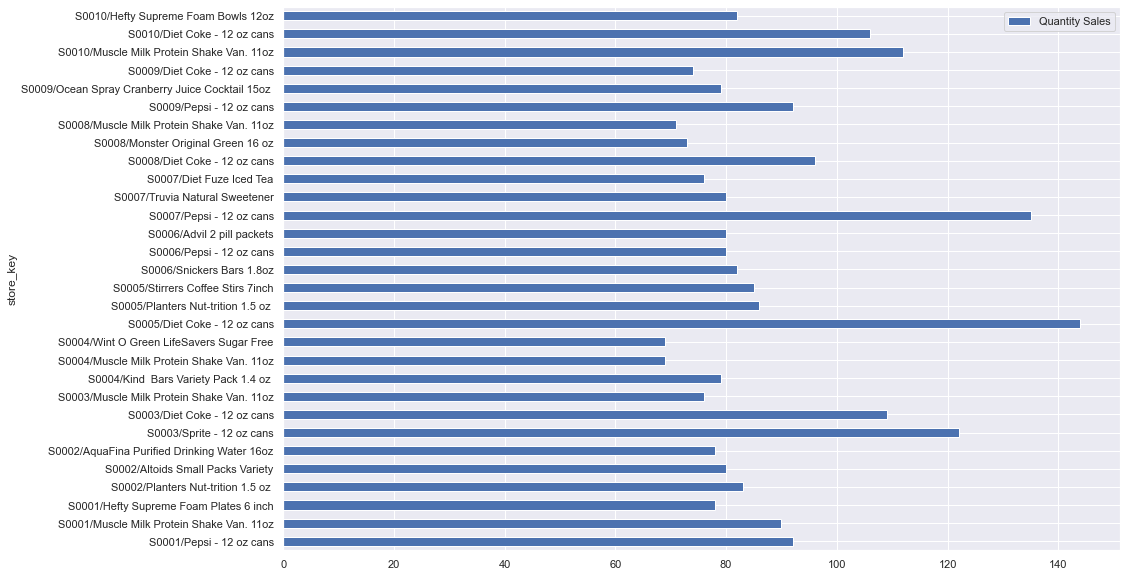

In [104]:
top_three_products['Quantity Sales'] = top_three_products['Quantity Sales'].astype('int64')
top_three_products['store_key'] = top_three_products['store_key']+'/'+top_three_products['item_name']
top_three_products.plot.barh(x= 'store_key', y = 'Quantity Sales', figsize = (15,10), rot = 0)

In [ ]:

category_names = ['S0001','S0002','S0003','S0004','S0005','S0006','S0007','S0008','S0009','S0010']
# results = {
#     'Question 1': [10, 15, 17, 32, 26],
#     'Question 2': [26, 22, 29, 10, 13],
#     'Question 3': [35, 37, 7, 2, 19],
#     'Question 4': [32, 11, 9, 15, 33],
#     'Question 5': [21, 29, 5, 5, 40],
#     'Question 6': [8, 19, 5, 30, 38]
# }
results = dict(zip(top_three_products.store_key, top_three_products.item_name))

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(top_three_products['store_key'])
    data = np.array(list(top_three_products.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdY'](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)
        
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

<b>Q7: What products have been sold through card or mobile since X days?</b>

In [219]:
x=input()

300


In [38]:
from datetime import datetime
print("Please insert the date range in 'day month, year' format")
start_date = input()
end_date = input()
# date = "12/11/2018 09:15:32"
# date = datetime.strptime(date, "%d/%m/%Y %H:%M:%S")
start_date = datetime.strptime(start_date,'%d %B, %Y')
end_date = datetime.strptime(end_date,'%d %B, %Y')

Please insert the date range in 'day month, year' format
8 June, 2018
10 June, 2018


In [226]:
con = PostgresConnection().getConnection()
string1 = """SELECT item_dim.item_name
FROM star_schema.fact_table
JOIN star_schema.item_dim ON item_dim.item_key = fact_table.item_key
JOIN star_schema.trans_dim ON trans_dim.payment_key = fact_table.payment_key
JOIN star_schema.time_data ON time_data.time_key = fact_table.time_key
WHERE time_data.date>(CURRENT_DATE::date - '"""
string2=str(x)+" days'::interval) AND (trans_dim.trans_type='card' OR trans_dim.trans_type='mobile') GROUP BY item_name"
# GROUP BY CUBE(item_name,trans_type,date) 
# ORDER BY item_name"""
cur = con.cursor()
insert_stmt = string1+string2
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
products_sold = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [229]:
products_sold.values
# products_sold= products_sold.drop(['trans_type', 'date'], axis=1)
# products_sold.item_name.drop_duplicates().tolist()

array([['100% Juice Box Variety 6.75 oz '],
       ['A&W Root Beer Diet - 12 oz cans'],
       ['All Purpose Cleaner 409 Spray'],
       ['Altoids Small Packs Variety'],
       ['Apple Sauce Variety GoGO Squeeze 3.2oz'],
       ['AquaFina Purified Drinking Water 16oz'],
       ['Austin Cookie Cracker Variety'],
       ['Baked Chips Variety Mix Frito'],
       ['Belvita Hard Biscuits Blueberry'],
       ['Blue Diamond Almonds Rstd, Sltd'],
       ['Bounty Paper Towels Select a Size '],
       ['Breath Savers Peppermints 12/roll '],
       ['Brisk Lemon Iced Tea - 12 oz cans'],
       ['Cascade Gel Packs Dishwasher'],
       ['Cascade Gel w/ Dawn Dishwasher'],
       ['Charmin Ultra Bath Tissue'],
       ["Cheetos Flamin' Hot 1 oz"],
       ['Cheez It White Cheddar 1.5 oz'],
       ['Cherry Coke 12oz'],
       ['Cherry Coke Zero 12 pack'],
       ['Chewy Granola Variety Bars Quaker'],
       ['Chex Mix Original'],
       ['Chobani Greek Yogurt Variety Pack '],
       ['Clear Plastic 12 o

<b>Q8: What season(quarter) is the worst for each product item? As example,</b>

In [95]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT item_dim.item_name, quarter, SUM(quantity)
FROM star_schema.fact_table
JOIN star_schema.item_dim ON item_dim.item_key = fact_table.item_key
JOIN star_schema.time_data ON time_data.time_key = fact_table.time_key
GROUP BY CUBE(item_name, time_data.quarter)
ORDER BY item_name, SUM(quantity)"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
worst_season = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [96]:
worst_season.dropna()

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,100% Juice Box Variety 6.75 oz,Q4,5806
2,100% Juice Box Variety 6.75 oz,Q2,5876
3,100% Juice Box Variety 6.75 oz,Q3,6045
5,A&W Root Beer - 12 oz cans,Q2,5735
...,...,...,...
1288,Yoplait Original Yogurt Variety Pack,Q3,5761
1290,Zoo Animal Cookies/Crackers,Q1,5462
1291,Zoo Animal Cookies/Crackers,Q2,5508
1292,Zoo Animal Cookies/Crackers,Q4,5520


In [97]:
worst_season = worst_season.groupby('item_name').head(1)
worst_season.head(10)

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698
5,A&W Root Beer - 12 oz cans,Q2,5735
10,A&W Root Beer Diet - 12 oz cans,Q4,5589
15,Advil 2 pill packets,Q1,5453
20,All Purpose Cleaner 409 Spray,Q1,5325
25,Altoids Small Packs Variety,Q3,5466
30,Apple Sauce Variety GoGO Squeeze 3.2oz,Q4,5585
35,AquaFina Purified Drinking Water 16oz,Q1,5299
40,Austin Cookie Cracker Variety,Q1,5597
45,Austin Toasty Crackers w/ PBtr,Q2,5274


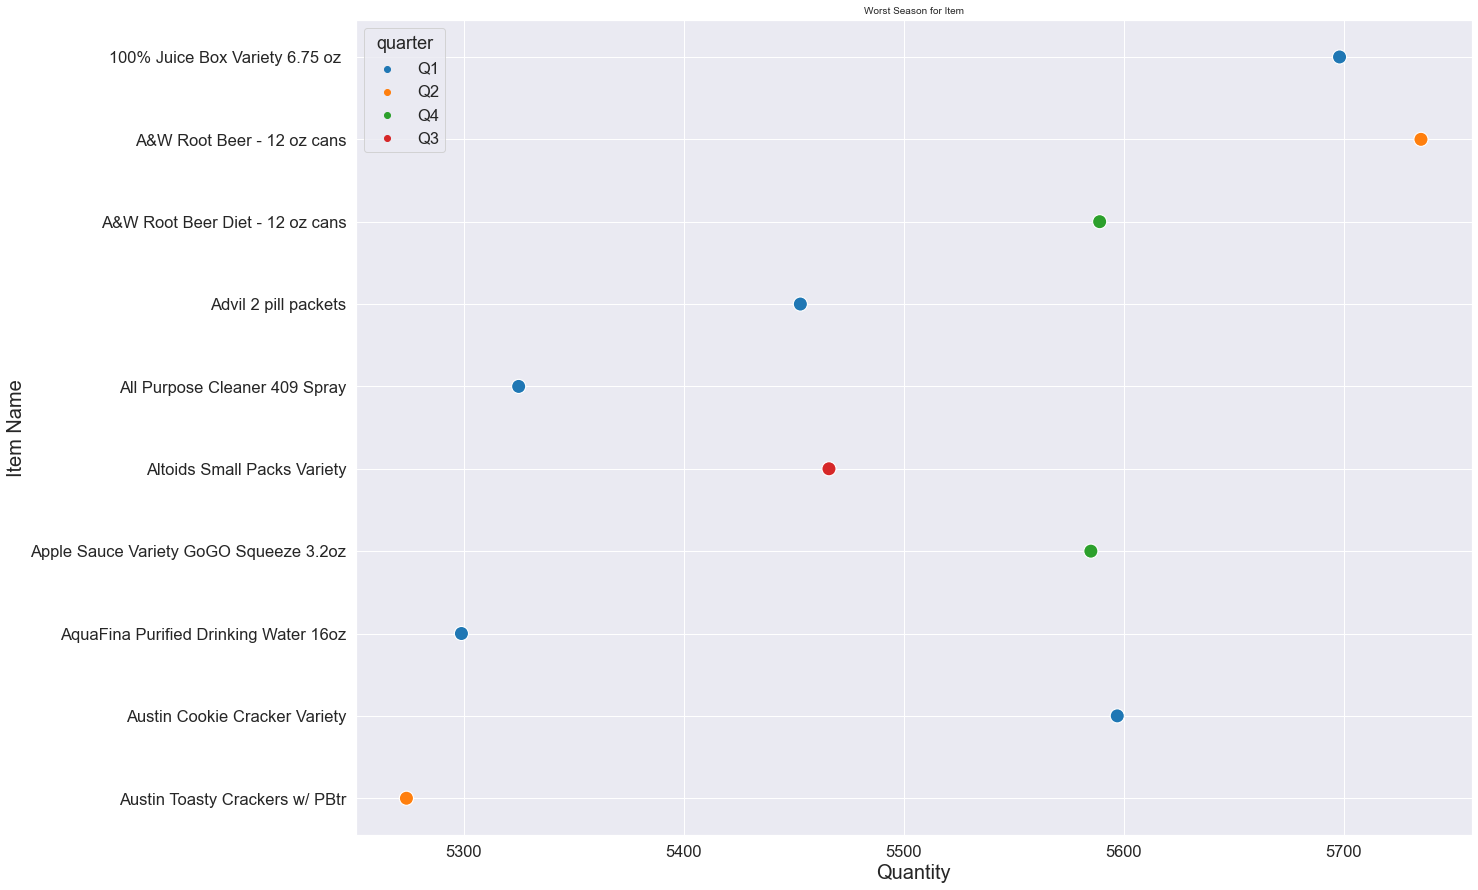

In [98]:
import seaborn as sns
worst_season=worst_season[0:10]

plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)
plt.title('Worst Season for Item',fontsize=10)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=worst_season, x="sum", y="item_name", hue="quarter",palette='tab10',s=200)
sns.set(font_scale = 1)

Q9: Break down the total sales of items geographically (division-wise).

In [90]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT item_name,division,  SUM(quantity)
FROM star_schema.fact_table
JOIN star_schema.store_dim ON store_dim.store_key = fact_table.store_key
JOIN star_schema.item_dim ON item_dim.item_key = fact_table.item_key
GROUP BY CUBE(division, item_dim.item_name)
ORDER BY item_name DESC"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_sales_geographically = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [91]:
total_sales_geographically.dropna()

,item_name,division,sum
8,Zoo Animal Cookies/Crackers,DHAKA,8449
9,Zoo Animal Cookies/Crackers,SYLHET,1052
10,Zoo Animal Cookies/Crackers,RANGPUR,1799
11,Zoo Animal Cookies/Crackers,CHITTAGONG,3983
12,Zoo Animal Cookies/Crackers,KHULNA,2531
...,...,...,...
2074,100% Juice Box Variety 6.75 oz,BARISAL,1586
2075,100% Juice Box Variety 6.75 oz,KHULNA,2517
2077,100% Juice Box Variety 6.75 oz,CHITTAGONG,4330
2078,100% Juice Box Variety 6.75 oz,RANGPUR,1779


In [92]:
total_sales_geographically = total_sales_geographically.dropna()
total_sales_geographically = total_sales_geographically.groupby('division').head(10)
total_sales_geographically

,item_name,division,sum
8,Zoo Animal Cookies/Crackers,DHAKA,8449
9,Zoo Animal Cookies/Crackers,SYLHET,1052
10,Zoo Animal Cookies/Crackers,RANGPUR,1799
11,Zoo Animal Cookies/Crackers,CHITTAGONG,3983
12,Zoo Animal Cookies/Crackers,KHULNA,2531
...,...,...,...
82,Waterloo Sparkling Lemon 12oz,CHITTAGONG,4223
83,Waterloo Sparkling Lemon 12oz,SYLHET,1059
84,Waterloo Sparkling Lemon 12oz,RAJSHAHI,2388
85,Waterloo Sparkling Lemon 12oz,BARISAL,1656


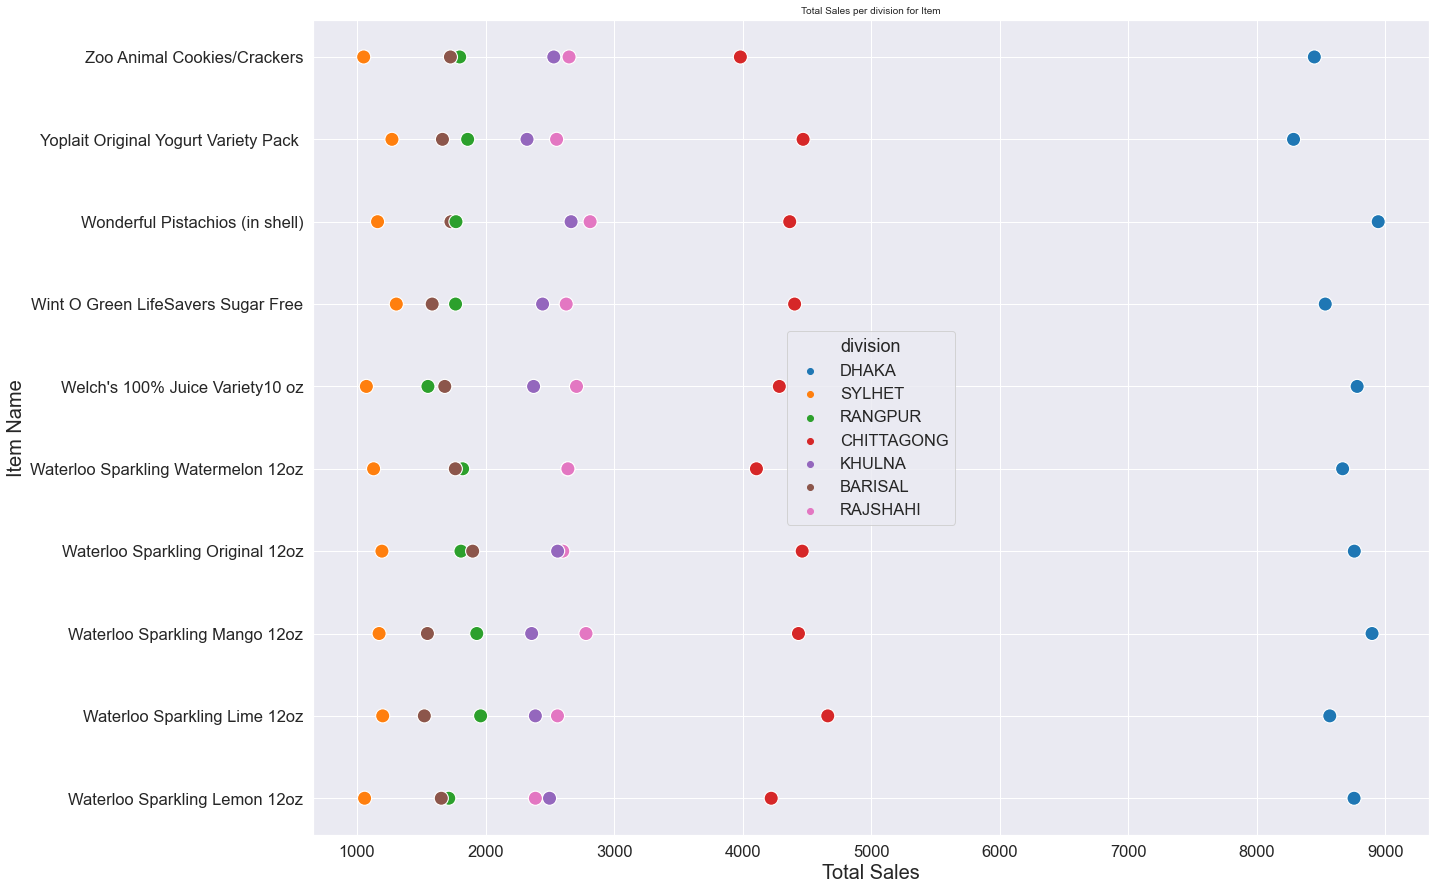

In [93]:
import seaborn as sns
total_sales_geographically=total_sales_geographically[0:70]

plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)
plt.title('Total Sales per division for Item',fontsize=10)
plt.ylabel('Item Name',fontsize=20)
plt.xlabel('Total Sales',fontsize=20)
sns.scatterplot(data=total_sales_geographically, x="sum", y="item_name", hue="division",palette='tab10',s=200)
sns.set(font_scale = 1)

Q10: What are the average sales of products sales per store monthly?

In [81]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT store_dim.store_key as "STORE", month as "MONTH", SUM(total_price)/30 as "Average sales"
FROM star_schema.fact_table
JOIN star_schema.store_dim ON store_dim.store_key = fact_table.store_key
JOIN star_schema.time_data ON time_data.time_key = fact_table.time_key
GROUP BY CUBE(store_dim.store_key, time_data."month")
ORDER By store_dim.store_key, month"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
avg_sales_prod = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()

Connection to DB established!


C:\Users\istia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [82]:
avg_sales_prod = avg_sales_prod.dropna()
avg_sales_prod = avg_sales_prod.groupby('STORE').head(12)

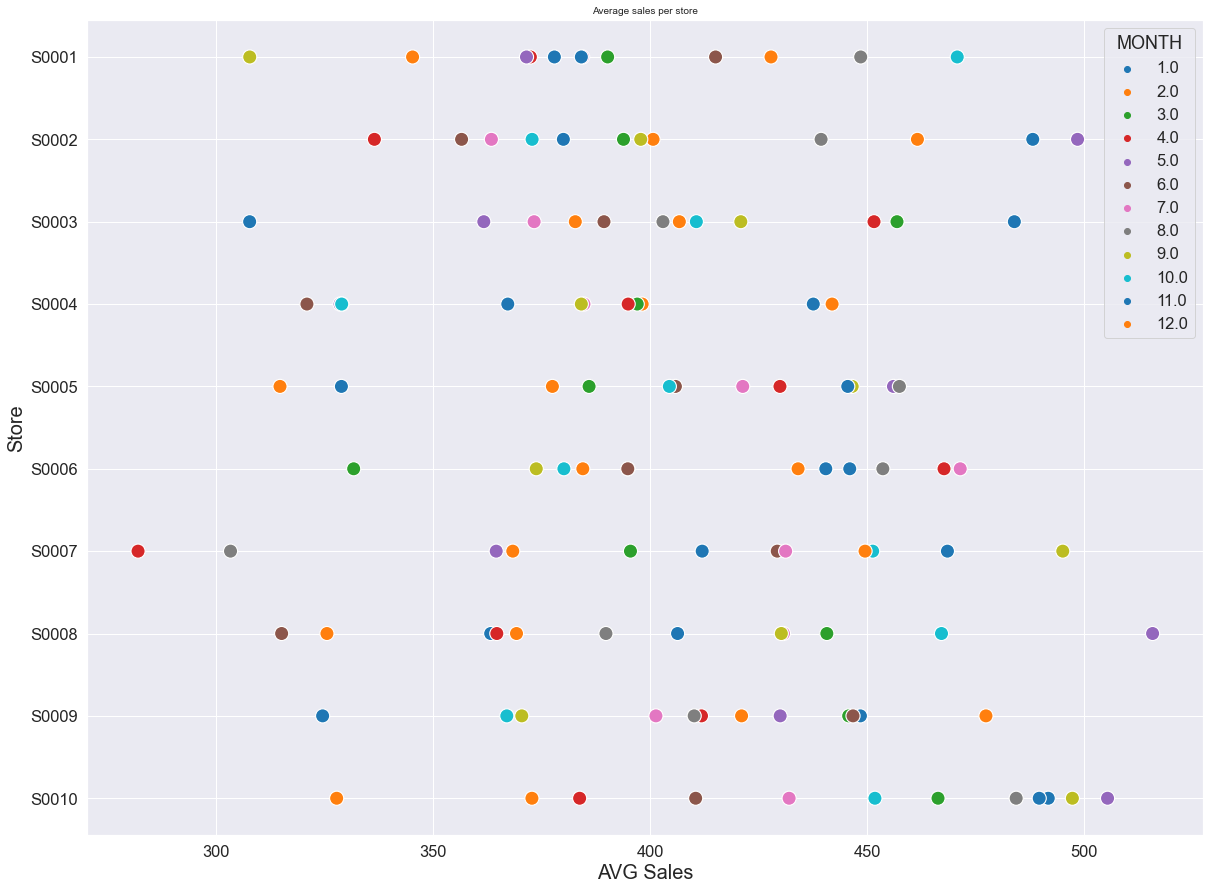

In [83]:
import seaborn as sns
avg_sales_prod=avg_sales_prod[0:120]

plt.figure(figsize = (20, 15))
sns.set(font_scale = 1.5)
plt.title('Average sales per store',fontsize=10)
plt.ylabel('Store',fontsize=20)
plt.xlabel('AVG Sales',fontsize=20)
sns.scatterplot(data=avg_sales_prod, x="Average sales", y="STORE", hue="MONTH",palette='tab10',s=200)
sns.set(font_scale = 1)